In [2]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [4]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_760679.tsv', sep='\t')
VEF_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_VEF_zscore.tsv', sep='\t')
VEF_df.describe()

,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
count,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000
mean,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,NaN,0.000,-0.000,-0.000,0.000,-0.000,NaN,-0.000,NaN,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,NaN,-0.000,0.000,-0.000,0.000,NaN,-0.000,NaN,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000
min,-3.071,-4.178,-4.665,-5.994,-5.530,-2.963,-1.741,-2.223,-2.539,-3.762,-4.128,-4.924,-4.987,-2.823,NaN,-2.453,-3.506,-4.290,-4.320,-3.525,NaN,-3.342,NaN,-2.462,-3.177,-2.987,-4.315,-3.715,-2.924,-2.844,NaN,-2.212,-3.474,-2.917,-3.403,NaN,-4.443,NaN,-3.275,-2.586
25%,-0.706,-0.689,-0.697,-0.625,-0.686,-0.747,-0.818,-0.673,-0.734,-0.721,-0.702,-0.700,-0.680,-0.782,NaN,-0.691,-0.682,-0.656,-0.645,-0.771,NaN,-0.782,NaN,-0.672,-0.687,-0.701,-0.686,-0.592,-0.721,-0.736,NaN,-0.627,-0.694,-0.677,-0.676,NaN,-0.692,NaN,-0.725,-0.677
50%,-0.202,-0.208,-0.205,-0.039,-0.102,-0.115,-0.316,-0.253,-0.210,-0.234,-0.183,-0.130,-0.071,-0.168,NaN,-0.212,-0.233,-0.248,-0.241,-0.136,NaN,-0.044,NaN,-0.240,-0.191,-0.259,-0.232,-0.175,-0.249,-0.159,NaN,-0.259,-0.145,-0.264,-0.243,NaN,-0.215,NaN,-0.193,-0.221
75%,0.493,0.481,0.495,0.573,0.594,0.641,0.613,0.392,0.543,0.525,0.527,0.636,0.626,0.658,NaN,0.467,0.483,0.388,0.380,0.700,NaN,0.754,NaN,0.412,0.456,0.444,0.448,0.361,0.493,0.619,NaN,0.317,0.497,0.395,0.423,NaN,0.512,NaN,0.561,0.420
max,6.455,5.184,5.623,6.448,4.656,4.533,3.655,8.456,5.766,6.191,6.044,4.098,4.231,4.624,NaN,8.384,5.613,6.558,6.388,4.103,NaN,4.445,NaN,8.475,7.113,6.104,7.072,6.734,4.692,4.500,NaN,9.919,6.630,6.189,6.035,NaN,4.868,NaN,6.659,8.890


In [3]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [5]:
cell_type = "K562"
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

# 针对每个 assay，在 VEF_df 中找到对应的列并生成扰动列
for assay in assays:
    col = f"{cell_type}_{assay}"
    if col in VEF_df.columns:
        VEF_df[f"{col}_+1"] = VEF_df[col] + 1
        VEF_df[f"{col}_-1"] = VEF_df[col] - 1
    else:
        print(f"列不存在: {col}")

In [6]:
VEF_df.describe()

,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF,K562_DNase_+1,K562_DNase_-1,K562_H3K4me3_+1,K562_H3K4me3_-1,K562_H3K27ac_+1,K562_H3K27ac_-1,K562_CTCF_+1,K562_CTCF_-1
count,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000
mean,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,NaN,0.000,-0.000,-0.000,0.000,-0.000,NaN,-0.000,NaN,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,NaN,-0.000,0.000,-0.000,0.000,NaN,-0.000,NaN,-0.000,0.000,1.000,-1.000,1.000,-1.000,1.000,-1.000,1.000,-1.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-3.071,-4.178,-4.665,-5.994,-5.530,-2.963,-1.741,-2.223,-2.539,-3.762,-4.128,-4.924,-4.987,-2.823,NaN,-2.453,-3.506,-4.290,-4.320,-3.525,NaN,-3.342,NaN,-2.462,-3.177,-2.987,-4.315,-3.715,-2.924,-2.844,NaN,-2.212,-3.474,-2.917,-3.403,NaN,-4.443,NaN,-3.275,-2.586,-2.071,-4.071,-3.178,-5.178,-3.665,-5.665,-1.223,-3.223
25%,-0.706,-0.689,-0.697,-0.625,-0.686,-0.747,-0.818,-0.673,-0.734,-0.721,-0.702,-0.700,-0.680,-0.782,NaN,-0.691,-0.682,-0.656,-0.645,-0.771,NaN,-0.782,NaN,-0.672,-0.687,-0.701,-0.686,-0.592,-0.721,-0.736,NaN,-0.627,-0.694,-0.677,-0.676,NaN,-0.692,NaN,-0.725,-0.677,0.294,-1.706,0.311,-1.689,0.303,-1.697,0.327,-1.673
50%,-0.202,-0.208,-0.205,-0.039,-0.102,-0.115,-0.316,-0.253,-0.210,-0.234,-0.183,-0.130,-0.071,-0.168,NaN,-0.212,-0.233,-0.248,-0.241,-0.136,NaN,-0.044,NaN,-0.240,-0.191,-0.259,-0.232,-0.175,-0.249,-0.159,NaN,-0.259,-0.145,-0.264,-0.243,NaN,-0.215,NaN,-0.193,-0.221,0.798,-1.202,0.792,-1.208,0.795,-1.205,0.747,-1.253
75%,0.493,0.481,0.495,0.573,0.594,0.641,0.613,0.392,0.543,0.525,0.527,0.636,0.626,0.658,NaN,0.467,0.483,0.388,0.380,0.700,NaN,0.754,NaN,0.412,0.456,0.444,0.448,0.361,0.493,0.619,NaN,0.317,0.497,0.395,0.423,NaN,0.512,NaN,0.561,0.420,1.493,-0.507,1.481,-0.519,1.495,-0.505,1.392,-0.608
max,6.455,5.184,5.623,6.448,4.656,4.533,3.655,8.456,5.766,6.191,6.044,4.098,4.231,4.624,NaN,8.384,5.613,6.558,6.388,4.103,NaN,4.445,NaN,8.475,7.113,6.104,7.072,6.734,4.692,4.500,NaN,9.919,6.630,6.189,6.035,NaN,4.868,NaN,6.659,8.890,7.455,5.455,6.184,4.184,6.623,4.623,9.456,7.456


In [5]:
subprocess.run([
    'python', 'train_scripts/test_1115_gradient.py', 
    '-s', 'saved/1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF/1110_135744',
    '-c', 'configs/config_1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF_gradient.yaml',
    '-o', 'gradient',
    '--compute_grad', 
    '-de', 'cuda:1'],
    cwd='..'
)

use new config: configs/config_1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF_gradient.yaml
==> Computing gradients for ALL input fields...
Saving gradients to: saved/1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF/1110_135744/gradient


100%|██████████| 186/186 [01:22<00:00,  2.25it/s]


Saved saved/1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF/1110_135744/gradient/grad_seq.npy | shape = (760679, 200, 4)
Saved saved/1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF/1110_135744/gradient/grad_feature.npy | shape = (760679, 5, 4)


CompletedProcess(args=['python', 'train_scripts/test_1115_gradient.py', '-s', 'saved/1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF/1110_135744', '-c', 'configs/config_1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF_gradient.yaml', '-o', 'gradient', '--compute_grad', '-de', 'cuda:1'], returncode=0)

In [21]:
gradient = np.load('../saved/1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF/1110_135744/gradient/grad_feature.npy')
gradient.shape

(760679, 5, 4)

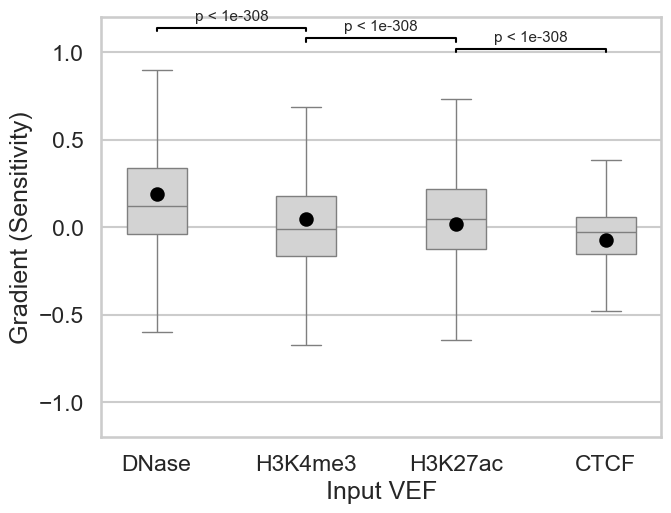

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# 加载梯度
gradient = np.load('../saved/1111_Gosai_MPRA_MyResTrans_seq_Sei_VEF/1110_135744/gradient/grad_feature.npy')

k562_grad = gradient[:, 0, :]
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

plot_df = pd.DataFrame({
    "Gradient": k562_grad.reshape(-1),
    "Feature": np.tile(assays, reps=k562_grad.shape[0])
})

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

sns.boxplot(
    data=plot_df,
    x='Feature',
    y='Gradient',
    color='lightgray',
    fliersize=0,
    width=0.4,
    ax=ax
)

# 画均值点
means = plot_df.groupby("Feature")["Gradient"].mean()
for i, feat in enumerate(assays):
    ax.scatter(i, means[feat], s=80, color='black', zorder=5)

# y 轴范围
ax.set_ylim([-1.2, 1.2])
ax.set_ylabel("Gradient (Sensitivity)")
ax.set_xlabel("Input VEF")

# ==========================
#       添加显著性标记
# ==========================
x_positions = [0, 1, 2, 3]  # 相邻比较: 0-1, 1-2, 2-3
y_max = ax.get_ylim()[1]

# 各比较的高度
heights = [y_max*0.95, y_max*0.90, y_max*0.85]

comparisons = [(0,1), (1,2), (2,3)]

for idx, (i, j) in enumerate(comparisons):
    # 检验两组
    data1 = k562_grad[:, i]
    data2 = k562_grad[:, j]
    _, p = mannwhitneyu(data1, data2, alternative='two-sided')

    # p 值文字（你的要求：统一 p < 1e-308）
    text = "p < 1e-308"

    # 画 bracket
    x1, x2 = i, j
    y = heights[idx]
    y_text = y + (y_max * 0.02)

    ax.plot([x1, x1, x2, x2], [y-0.02, y, y, y-0.02], lw=1.5, color='black')
    ax.text((x1+x2)/2, y_text, text, ha='center', va='bottom', fontsize=11)

# ==========================


plt.savefig(f'figures/EpiCast_K562_gradient_boxplot.png', dpi=400)
plt.savefig(f'figures_pdf/EpiCast_K562_gradient_boxplot.pdf', dpi=400)
plt.show()